Analyzing National Hockey League (NHL) Draft Data

The annual NHL draft if one of the most impotant times of the year for each and every team in the NHL. There are 7 rounds with 32 players selected in each round, for a total of 224 players. Each and every selection is of extreme importance and will have a great impact on the success of the teams moving forward. These players can be developed into full-time NHL players, the players or the draft pick may be traded, or the player draftd may never get the chance to play in the league. 

Some of the greatest players to have played in the NHL have been selected in later rounds of the NHL draft. As a result, there is much work to be done in terms of selecting players in the NHL draft. In this project, we will work toward identifying key features that describe a "successful" NHL draft pick. We use historical NHL draft data that was uploaded as an open source to GitHub by Oliver Schulte. 

In [492]:
import numpy as np 
import pandas as pd 
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [493]:
draft_data = pd.read_csv (r'C:\Users\seanf\OneDrive\Documents\SUMMER RESEARCH PROJECT\data\playerstats.csv')

In [494]:
print(draft_data)

           id       PlayerName  DraftAge     Country country_group  Height  \
0       14643       A.J. Jenks        18         USA           USA      74   
1       11595      A.J. Thelen        18         USA           USA      75   
2       11601   Aaron Boogaard        18      Canada           CAN      75   
3     8471451     Aaron Gagnon        18         CAN           CAN      71   
4       55441     Aaron Gionet        18      Canada           CAN      74   
...       ...              ...       ...         ...           ...     ...   
2219    10870      Zbynek Irgl        20  Czech Rep.          EURO      72   
2220    57300     Zbynek Novak        18  Czech Rep.          EURO      75   
2221     9235  Zdenek Bahensky        18  Czech Rep.          EURO      74   
2222  8467941    Zdenek Blatny        18         CZE          EURO      73   
2223  8468717    Zdenek Kutlak        20         CZE          EURO      75   

      Weight Position  DraftYear  Overall  ...  rs_PIM  rs_Plus

We will remove columns that are not going to be useful for our analysis. id, PlayerName, Country, Overall, and DraftYear are removed with the code below.

In [495]:
draft_data=draft_data.drop(['PlayerName','Country','Overall','DraftYear'], axis=1)

In [496]:
#convert GP_greater_than_0 to binary 0-No 1-Yes
draft_data_1=pd.get_dummies(draft_data["GP_greater_than_0"])
draft_data_2=pd.concat((draft_data_1, draft_data), axis=1)
draft_data_2=draft_data_2.drop(["GP_greater_than_0"], axis=1)
draft_data_2=draft_data_2.drop(["no"], axis=1)
draft_data_v=draft_data_2.rename(columns={"yes": "GP_greater_than_0"})

print(draft_data_v)

      GP_greater_than_0       id  DraftAge country_group  Height  Weight  \
0                     0    14643        18           USA      74     205   
1                     0    11595        18           USA      75     212   
2                     0    11601        18           CAN      75     220   
3                     1  8471451        18           CAN      71     186   
4                     0    55441        18           CAN      74     205   
...                 ...      ...       ...           ...     ...     ...   
2219                  0    10870        20          EURO      72     194   
2220                  0    57300        18          EURO      75     254   
2221                  0     9235        18          EURO      74     190   
2222                  1  8467941        18          EURO      73     195   
2223                  1  8468717        20          EURO      75     210   

     Position  CSS_rank  rs_GP  rs_G  ...  rs_P  rs_PIM  rs_PlusMinus  po_GP  \
0      

In [497]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(draft_data_v, test_size=0.3, random_state=5)

In [498]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1556 entries, 334 to 1725
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   GP_greater_than_0  1556 non-null   uint8 
 1   id                 1556 non-null   int64 
 2   DraftAge           1556 non-null   int64 
 3   country_group      1556 non-null   object
 4   Height             1556 non-null   int64 
 5   Weight             1556 non-null   int64 
 6   Position           1556 non-null   object
 7   CSS_rank           1556 non-null   int64 
 8   rs_GP              1556 non-null   int64 
 9   rs_G               1556 non-null   int64 
 10  rs_A               1556 non-null   int64 
 11  rs_P               1556 non-null   int64 
 12  rs_PIM             1556 non-null   int64 
 13  rs_PlusMinus       1556 non-null   int64 
 14  po_GP              1556 non-null   int64 
 15  po_G               1556 non-null   int64 
 16  po_A               1556 non-null   int64

Variable Descriptions:


DraftAge: Age at which player was drafted

country_group: EURO, USA, or CAN

Height: Player height

Weight: Player weight

Position: Players position

CSS_rank: NHL central scouting rank

*All stats below are player stats from draft year*

rs_GP: regular season games okayed

rs_G: regular season goals

rs_A: regular season assists

rs_P: regular season points

rs_PIM: regular season penalty minutes

rs_PlusMinus: regular season plus/minus

po_GP: playoff games played

po_G: playoff goals

po_A: playoff assists

po_P: playoff points

po_PIM: playoff penalty minutes 



sum_7yr_GP: total NHL games played 7 years after being drafted

sum_7yr_TOI: total NHL time on ice 7 years after being drafted

GP_greater_than_0: Drafted player has played in an NHL game 7 years after being drafted? (Yes-1 or No-0)

In [499]:
train.describe()

,GP_greater_than_0,id,DraftAge,Height,Weight,CSS_rank,rs_GP,rs_G,rs_A,rs_P,rs_PIM,rs_PlusMinus,po_GP,po_G,po_A,po_P,po_PIM,sum_7yr_GP,sum_7yr_TOI
count,1556.000000,1.556000e+03,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000
mean,0.430591,3.751092e+06,18.858612,73.359897,202.233290,92.678663,53.005784,14.914524,21.827121,36.739075,66.865681,2.073907,5.453085,1.374036,2.052057,3.426093,6.572622,59.672879,948.912596
std,0.495318,4.197797e+06,1.457853,1.988465,15.363805,72.409843,16.581572,12.619426,16.171717,27.084530,53.229594,10.695087,6.269283,2.692888,3.720870,5.999062,10.353333,110.060079,1956.963298
min,0.000000,9.000000e+00,18.000000,64.000000,154.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.249075e+04,18.000000,72.000000,192.000000,30.750000,42.000000,5.000000,10.000000,16.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.842700e+04,18.000000,73.000000,201.000000,78.000000,56.000000,12.000000,18.000000,31.000000,55.000000,0.000000,4.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
75%,1.000000,8.470042e+06,19.000000,75.000000,212.000000,136.000000,66.000000,22.000000,31.000000,52.000000,90.250000,4.000000,9.000000,2.000000,3.000000,5.000000,10.000000,66.000000,717.250000
max,1.000000,8.474762e+06,32.000000,81.000000,265.000000,250.000000,90.000000,78.000000,110.000000,188.000000,408.000000,70.000000,30.000000,22.000000,30.000000,46.000000,81.000000,524.000000,13488.000000


In [500]:
test.describe()

,GP_greater_than_0,id,DraftAge,Height,Weight,CSS_rank,rs_GP,rs_G,rs_A,rs_P,rs_PIM,rs_PlusMinus,po_GP,po_G,po_A,po_P,po_PIM,sum_7yr_GP,sum_7yr_TOI
count,668.000000,6.680000e+02,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,0.440120,3.828168e+06,18.983533,73.345808,202.356287,98.269461,52.529940,14.661677,21.118263,35.778443,68.288922,1.667665,5.547904,1.318862,2.023952,3.342814,6.652695,56.538922,887.320359
std,0.496773,4.207441e+06,1.673866,2.016096,15.684349,73.437114,16.437898,12.332326,15.262209,26.001707,57.207783,10.246016,6.197822,2.421506,3.415639,5.411756,10.343097,106.981804,1876.003043
min,0.000000,7.100000e+01,18.000000,67.000000,164.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.247200e+04,18.000000,72.000000,190.000000,32.000000,42.000000,5.000000,10.000000,16.000000,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.911500e+04,18.500000,73.000000,201.000000,85.500000,55.000000,11.000000,18.000000,31.000000,53.500000,0.000000,4.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
75%,1.000000,8.469841e+06,19.000000,75.000000,213.000000,173.500000,66.000000,21.000000,29.000000,49.000000,90.000000,3.000000,10.000000,2.000000,3.000000,5.000000,10.000000,55.500000,619.750000
max,1.000000,8.474744e+06,30.000000,80.000000,255.000000,250.000000,100.000000,62.000000,88.000000,139.000000,479.000000,50.000000,30.000000,17.000000,23.000000,33.000000,120.000000,471.000000,11754.000000


Above we can see that 43% of players in the training-set and 44% in the test-set ended up playing in at least one NHL game. We can see that there are no missing values in our data so we don't have to worry about that. 

In [501]:
train.head(10)

,GP_greater_than_0,id,DraftAge,country_group,Height,Weight,Position,CSS_rank,rs_GP,rs_G,...,rs_P,rs_PIM,rs_PlusMinus,po_GP,po_G,po_A,po_P,po_PIM,sum_7yr_GP,sum_7yr_TOI
334,1,8469733,19,CAN,72,178,C,107,72,38,...,73,122,6,15,8,6,14,35,16,171
1437,0,46656,20,USA,71,196,D,103,60,7,...,37,133,0,3,0,1,1,2,0,0
1057,0,12653,20,EURO,74,207,C,236,45,4,...,6,47,-1,5,1,0,1,6,0,0
1655,0,15343,19,CAN,75,209,D,61,61,3,...,13,125,-4,7,0,2,2,4,0,0
1541,0,9420,19,USA,71,190,D,58,37,2,...,10,42,-3,0,0,0,0,0,0,0
275,1,8471321,19,CAN,76,210,D,31,71,5,...,32,49,14,7,0,0,0,6,78,1234
2117,0,3245,18,EURO,72,194,C,120,52,13,...,29,16,5,0,0,0,0,0,0,0
1130,0,12264,18,CAN,75,205,D,236,46,15,...,40,73,0,15,7,6,13,10,0,0
1566,0,18030,19,CAN,74,229,L,118,54,10,...,23,121,5,15,3,4,7,11,0,0
548,1,8469619,20,EURO,72,198,D,176,76,6,...,23,30,0,12,0,1,1,10,225,3859


We may note that our features have different ranges, and we may have to convert them so that the scale is similar across all features. We are also interested in the binary variable "GP_greater_than_0" and this will be our target variable. For this project, sum_7yr_GP and sum_7yr_TOI could also be target variables however this was investigated in another project, where I applied statistical modelling such as zero-inflated models and Hurdle models. In this project, we are more interested in the classification. 

In [502]:
train.columns.values

array(['GP_greater_than_0', 'id', 'DraftAge', 'country_group', 'Height',
       'Weight', 'Position', 'CSS_rank', 'rs_GP', 'rs_G', 'rs_A', 'rs_P',
       'rs_PIM', 'rs_PlusMinus', 'po_GP', 'po_G', 'po_A', 'po_P',
       'po_PIM', 'sum_7yr_GP', 'sum_7yr_TOI'], dtype=object)

Above we can see the features that we currently have included in our data. Firstly, we will delete "sum_7yr_TOI" and "sum_7yr_GP" since we have decided that "GP_greater_than_0" is our target variable. We also needed to further investigate playoff statistics since not every player will play in the playoffs. This will leave us with our target variable plus 17 features. 

# EDA

### Playoff Statistics

C:\Users\seanf\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


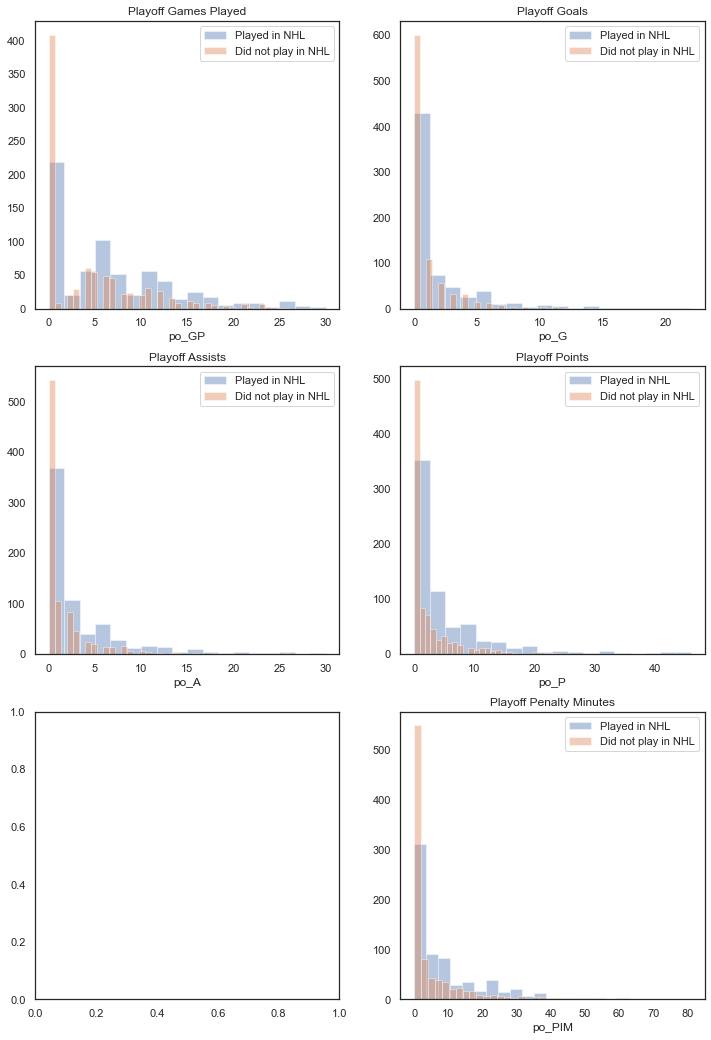

In [503]:
played = 'Played in NHL'
Nplayed = 'Did not play in NHL'
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,18))

ax = sns.distplot(train[train['GP_greater_than_0']==1].po_GP, bins=18, label = played, ax = axes[0,0], kde =False)
ax = sns.distplot(train[train['GP_greater_than_0']==0].po_GP, bins=40, label = Nplayed, ax = axes[0,0], kde =False)
ax.legend()
ax.set_title('Playoff Games Played')

ax = sns.distplot(train[train['GP_greater_than_0']==1].po_G, bins=18, label = played, ax = axes[0,1], kde = False)
ax = sns.distplot(train[train['GP_greater_than_0']==0].po_G, bins=40, label = Nplayed, ax = axes[0,1], kde = False)
ax.legend()
ax.set_title('Playoff Goals')

ax = sns.distplot(train[train['GP_greater_than_0']==1].po_A, bins=18, label = played, ax = axes[1,0], kde = False)
ax = sns.distplot(train[train['GP_greater_than_0']==0].po_A, bins=40, label = Nplayed, ax = axes[1,0], kde = False)
ax.legend()
ax.set_title('Playoff Assists')

ax = sns.distplot(train[train['GP_greater_than_0']==1].po_P, bins=18, label = played, ax = axes[1,1], kde = False)
ax = sns.distplot(train[train['GP_greater_than_0']==0].po_P, bins=40, label = Nplayed, ax = axes[1,1], kde = False)
ax.legend()
ax.set_title('Playoff Points')

ax = sns.distplot(train[train['GP_greater_than_0']==1].po_PIM, bins=18, label = played, ax = axes[2,1], kde = False)
ax = sns.distplot(train[train['GP_greater_than_0']==0].po_PIM, bins=40, label = Nplayed, ax = axes[2,1], kde = False)
ax.legend()
_=ax.set_title('Playoff Penalty Minutes')

In each case above, we can see that the probability of playing in the NHL is much higher for draft prospects who participate in the playoffs in their draft year. However, making the playoffs is considered to be more of a team success, and we must keep in mind that for this analysis we are more interested in each and every individual player. Therefore, we will create a binary variable for whether a players team made the playoffs or not, as this should be a more meaningful feature. After all, we can make the argument that the teams who make the playoffs are comprised of better players than teams who do not make the playoffs. We may also argue that players whos teams make the playoffs are getting more exposure to NHL scouts, and perhaps good players on non-playoff teams are being overlooked. 

Lets have a look at these plots again, but this time omiting players who did not play in the playoffs (the zeros).

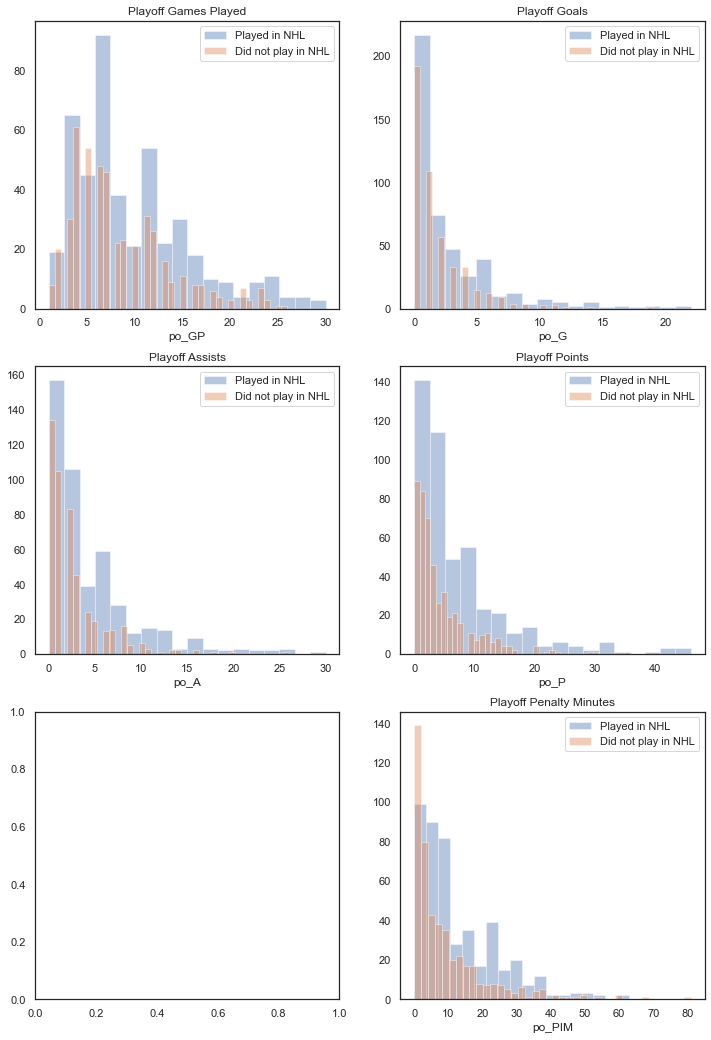

In [504]:
train_v0 = train.drop(train[train.po_GP < 1].index)

played = 'Played in NHL'
Nplayed = 'Did not play in NHL'
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,18))

ax = sns.distplot(train_v0[train_v0['GP_greater_than_0']==1].po_GP, bins=18, label = played, ax = axes[0,0], kde =False)
ax = sns.distplot(train_v0[train_v0['GP_greater_than_0']==0].po_GP, bins=40, label = Nplayed, ax = axes[0,0], kde =False)
ax.legend()
ax.set_title('Playoff Games Played')

ax = sns.distplot(train_v0[train_v0['GP_greater_than_0']==1].po_G, bins=18, label = played, ax = axes[0,1], kde = False)
ax = sns.distplot(train_v0[train_v0['GP_greater_than_0']==0].po_G, bins=40, label = Nplayed, ax = axes[0,1], kde = False)
ax.legend()
ax.set_title('Playoff Goals')

ax = sns.distplot(train_v0[train_v0['GP_greater_than_0']==1].po_A, bins=18, label = played, ax = axes[1,0], kde = False)
ax = sns.distplot(train_v0[train_v0['GP_greater_than_0']==0].po_A, bins=40, label = Nplayed, ax = axes[1,0], kde = False)
ax.legend()
ax.set_title('Playoff Assists')

ax = sns.distplot(train_v0[train_v0['GP_greater_than_0']==1].po_P, bins=18, label = played, ax = axes[1,1], kde = False)
ax = sns.distplot(train_v0[train_v0['GP_greater_than_0']==0].po_P, bins=40, label = Nplayed, ax = axes[1,1], kde = False)
ax.legend()
ax.set_title('Playoff Points')

ax = sns.distplot(train_v0[train_v0['GP_greater_than_0']==1].po_PIM, bins=18, label = played, ax = axes[2,1], kde = False)
ax = sns.distplot(train_v0[train_v0['GP_greater_than_0']==0].po_PIM, bins=40, label = Nplayed, ax = axes[2,1], kde = False)
ax.legend()
_=ax.set_title('Playoff Penalty Minutes')

We can clearly see above that players who score at least one point in the playoffs in their draft year have a higher chance of playing in the NHL. We also observe that the more points they score in the playoffs, the higher the probability of playing in the NHL. Next, we will create the binary variable that represents whether a players team made the playoffs or not. 

In [505]:
#convert po_GP to binary 1-played in at least one playoff game 0-did not play in the playoffs
trainv1=pd.get_dummies(train["po_GP"])
trainv2=pd.concat((trainv1, train), axis=1)
trainv2=trainv2.drop(["po_GP","po_G","po_A","po_P","po_PIM"], axis=1)
trainv2=trainv2.drop(trainv2.columns[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,
                                    16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]], axis=1)
trainv3=trainv2.rename(columns={0: "po_GP_greater_than_0"})

print(trainv3)

      po_GP_greater_than_0  GP_greater_than_0       id  DraftAge  \
334                      0                  1  8469733        19   
1437                     0                  0    46656        20   
1057                     0                  0    12653        20   
1655                     0                  0    15343        19   
1541                     1                  0     9420        19   
...                    ...                ...      ...       ...   
740                      1                  0    18444        19   
1032                     0                  1  8471778        19   
2121                     0                  1  8467383        18   
1424                     1                  0    11129        19   
1725                     0                  1  8471229        18   

     country_group  Height  Weight Position  CSS_rank  rs_GP  rs_G  rs_A  \
334            CAN      72     178        C       107     72    38    35   
1437           USA      71     

In [506]:
#flip binary outcome

trainv4=pd.get_dummies(trainv3["po_GP_greater_than_0"])
trainv5=pd.concat((trainv4, trainv3), axis=1)
trainv5=trainv5.drop(["po_GP_greater_than_0"], axis=1)
trainv5=trainv5.drop(trainv5.columns[[1]], axis=1)
trainv6=trainv5.rename(columns={0: "po_GP_greater_than_0"})

print(trainv6)

      po_GP_greater_than_0  GP_greater_than_0       id  DraftAge  \
334                      1                  1  8469733        19   
1437                     1                  0    46656        20   
1057                     1                  0    12653        20   
1655                     1                  0    15343        19   
1541                     0                  0     9420        19   
...                    ...                ...      ...       ...   
740                      0                  0    18444        19   
1032                     1                  1  8471778        19   
2121                     1                  1  8467383        18   
1424                     0                  0    11129        19   
1725                     1                  1  8471229        18   

     country_group  Height  Weight Position  CSS_rank  rs_GP  rs_G  rs_A  \
334            CAN      72     178        C       107     72    38    35   
1437           USA      71     

### Regular Season Statistics 

C:\Users\seanf\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


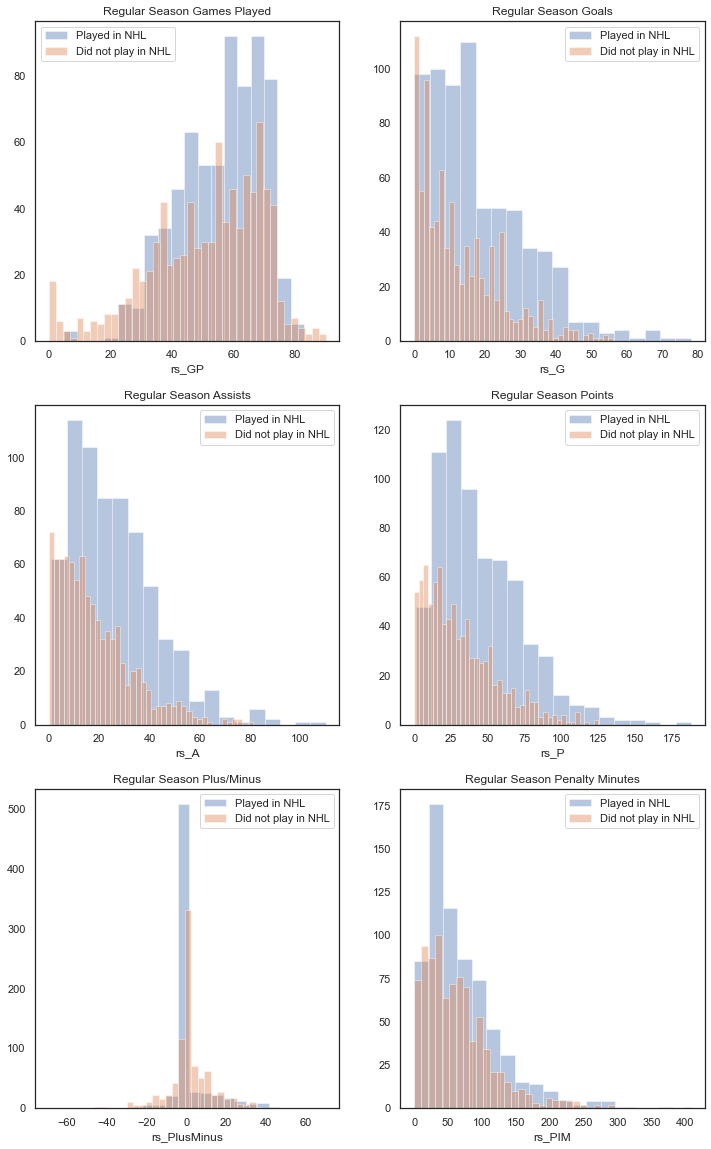

In [507]:
played = 'Played in NHL'
Nplayed = 'Did not play in NHL'
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,20))

ax = sns.distplot(trainv6[trainv6['GP_greater_than_0']==1].rs_GP, bins=18, label = played, ax = axes[0,0], kde =False)
ax = sns.distplot(trainv6[trainv6['GP_greater_than_0']==0].rs_GP, bins=40, label = Nplayed, ax = axes[0,0], kde =False)
ax.legend()
ax.set_title('Regular Season Games Played')

ax = sns.distplot(trainv6[trainv6['GP_greater_than_0']==1].rs_G, bins=18, label = played, ax = axes[0,1], kde = False)
ax = sns.distplot(trainv6[trainv6['GP_greater_than_0']==0].rs_G, bins=40, label = Nplayed, ax = axes[0,1], kde = False)
ax.legend()
ax.set_title('Regular Season Goals')

ax = sns.distplot(trainv6[trainv6['GP_greater_than_0']==1].rs_A, bins=18, label = played, ax = axes[1,0], kde = False)
ax = sns.distplot(trainv6[trainv6['GP_greater_than_0']==0].rs_A, bins=40, label = Nplayed, ax = axes[1,0], kde = False)
ax.legend()
ax.set_title('Regular Season Assists')

ax = sns.distplot(trainv6[trainv6['GP_greater_than_0']==1].rs_P, bins=18, label = played, ax = axes[1,1], kde = False)
ax = sns.distplot(trainv6[trainv6['GP_greater_than_0']==0].rs_P, bins=40, label = Nplayed, ax = axes[1,1], kde = False)
ax.legend()
ax.set_title('Regular Season Points')

ax = sns.distplot(trainv6[trainv6['GP_greater_than_0']==1].rs_PIM, bins=18, label = played, ax = axes[2,1], kde = False)
ax = sns.distplot(trainv6[trainv6['GP_greater_than_0']==0].rs_PIM, bins=40, label = Nplayed, ax = axes[2,1], kde = False)
ax.legend()
ax.set_title('Regular Season Penalty Minutes')

ax = sns.distplot(trainv6[trainv6['GP_greater_than_0']==1].rs_PlusMinus, bins=18, label = played, ax = axes[2,0], kde = False)
ax = sns.distplot(trainv6[trainv6['GP_greater_than_0']==0].rs_PlusMinus, bins=40, label = Nplayed, ax = axes[2,0], kde = False)
ax.legend()
_=ax.set_title('Regular Season Plus/Minus')

We can observe from the plots above that regular season statistics are all good features to use in our machine learning algorithms. All of these features surely contribute toward a higher probability of playing in the NHL. The plot for Plus/Minus is quite intresting as we can see that a Plus/Minus closer to zero and a Plus/Minus greater than 10 increases a players chance of playing in the NHL. As a result, I will create groups based on Plus/Minus later on. We can also see that players with 20-80 regular season games played have a high probability of playing in the NHL. Players with less than 20 games played seem to have a very low chance of playing in the NHL, this could be due to injury or some other reason and could be further investigated in the future. Since there much variability in games played, we will create new variables for regular season statistics that describe their stats per game, which will also help with feature scaling. First, we will check for multicolinearity. 

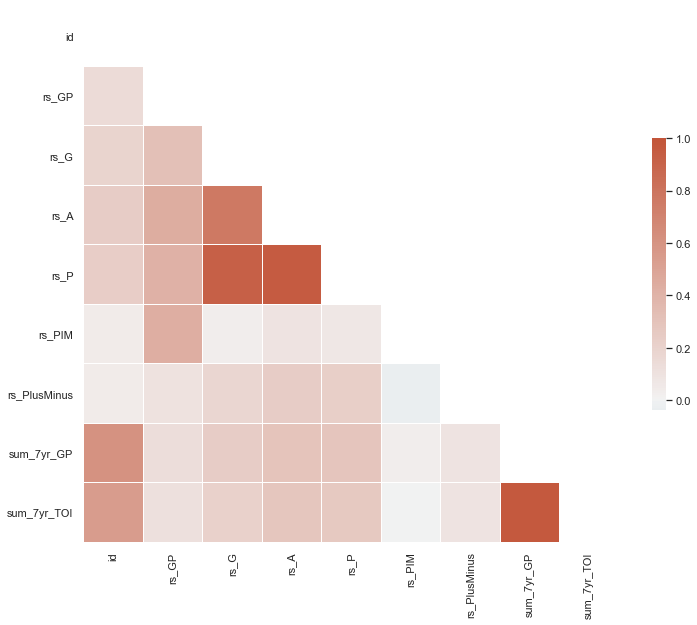

In [508]:
sns.set_theme(style="white")
train_corr = trainv6.drop(["po_GP_greater_than_0","GP_greater_than_0",
                          "DraftAge","country_group","Height","Weight",
                          "Position","CSS_rank"], axis=1)
corr = train_corr.corr()

mask=np.triu(np.ones_like(corr, dtype=bool))

fig, axes = plt.subplots(figsize=(12,10))

cmap = sns.diverging_palette(230,20,as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, square=True, 
           linewidths=0.5, cbar_kws={"shrink": 0.5})

plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

The correlation plot shows us that as expected, there is a high correlation between assists and points, and between goals and points. We will drop regular season points because of this, and due to the fact that there are no noticeable groups we can create for regular season points. 

### Draft Age

Next we will take a look at draft age to see if it will be useful as a feature in our algorithms. Keep in mind that this is the age at which the player was drafted, and most players are drafted at 18 years of age. 

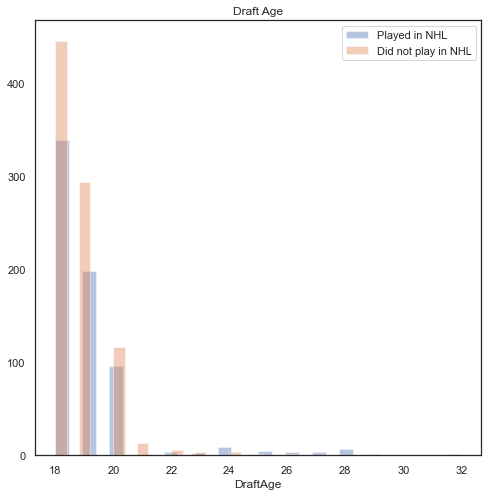

In [509]:
played = 'Played in NHL'
Nplayed = 'Did not play in NHL'
fig, axes = plt.subplots(figsize=(8,8))

ax = sns.distplot(trainv6[trainv6['GP_greater_than_0']==1].DraftAge, bins=30, label = played, kde =False)
ax = sns.distplot(trainv6[trainv6['GP_greater_than_0']==0].DraftAge, bins=35, label = Nplayed, kde =False)
ax.legend()
_=ax.set_title('Draft Age')

There isn't much variability in DraftAge and we can see that the probability of playing in an NHL game does not change much between ages. However, we see a noticeable difference from when a player is drafted at 19 to when a player is drafted at 20. We will create an indicator for when the player is 20+ years of age when drafted. 

### CSS Rank, country_group, po_GP_greater_than_0

Next we will have a look at NHL central scouting rankings. To start, we will look at CSS_rank and po_GP_greater_than_0. We want to see if a playerss CSS ranking is influenced by their team making the playoffs. We will then investigate if CSS rank is influenced by where the player is from by using the country_group variable. 

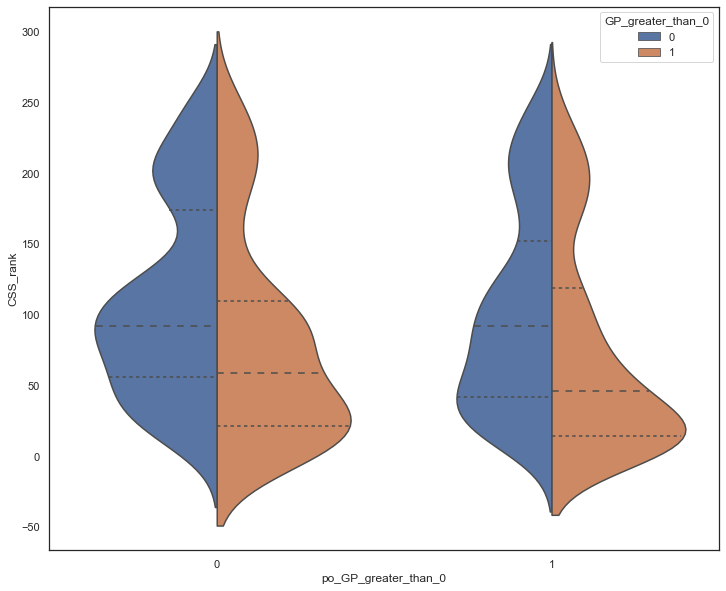

In [510]:
fig, axes = plt.subplots(figsize=(12,10))

_=sns.violinplot(x="po_GP_greater_than_0",y="CSS_rank", hue="GP_greater_than_0",
              data=trainv6, split=True, inner="quart", linewidth=1.5)

The plot above is quite informative as it tells us that NHL central scouting rankings are reliable in general, however when you look more closely at this 3-D visualization, we can see that some players are benefiting greatly from being on playoff teams in their draft year. This suggests that a bias is present but does not seem to be too significant. It also suggests that there are players on non-playoff teams that are being overlooked by scouts. This is an interesting result because there are many great players who have been drafted late in previous NHL drafts. Also, it may be beneficial to group the CSS_rank feature. For example, we may be interested in the grouping of players who are ranked between 30 and 100. For those who did not make playoffs, they had an approximate 50/50 chance of playing in the NHL. For those who did make playoffs, they had a much lower chance of playing in the NHL, interestingly enough.  

C:\Users\seanf\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


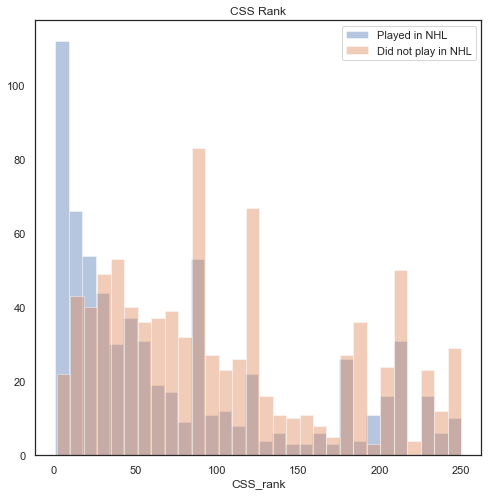

In [511]:
played = 'Played in NHL'
Nplayed = 'Did not play in NHL'
fig, axes = plt.subplots(figsize=(8,8))

ax = sns.distplot(trainv6[trainv6['GP_greater_than_0']==1].CSS_rank, bins=30, label = played, kde =False)
ax = sns.distplot(trainv6[trainv6['GP_greater_than_0']==0].CSS_rank, bins=30, label = Nplayed, kde =False)
ax.legend()
_=ax.set_title('CSS Rank')

Once again, the plot above illustrates why it is a good idea to make groupings for CSS_rank. It also shows why the 3-D visualization before this is so informative. In the 3-D visualization, we see an interesting case for players ranked between 30 and 100 that we do not see in the 2-D visualization. We do see an odd case here for players ranked around 200 who have had a high probability of playing in the NHL. We can investigate this further as it is very unexpected. Based on what we see above, we will group the CSS_rank variable according to draft rounds. The first group will be from 1 to 30, the second from 31 to 60, the third group from 61 to 90, and the last group will therefore consists of players ranked from 91 to 250. We do this because we notice the similarities within these groups by looking at the 2-D visualization. Furthermore, I will create an indicator for players ranked between 30 and 100 that returns a 0 if they were not on a playoff team and a 1 if they were. For players ranked outside of this range, the indicator will return a 2. This should be much more meaningful rather than using the CSS_rank feature on its own. 

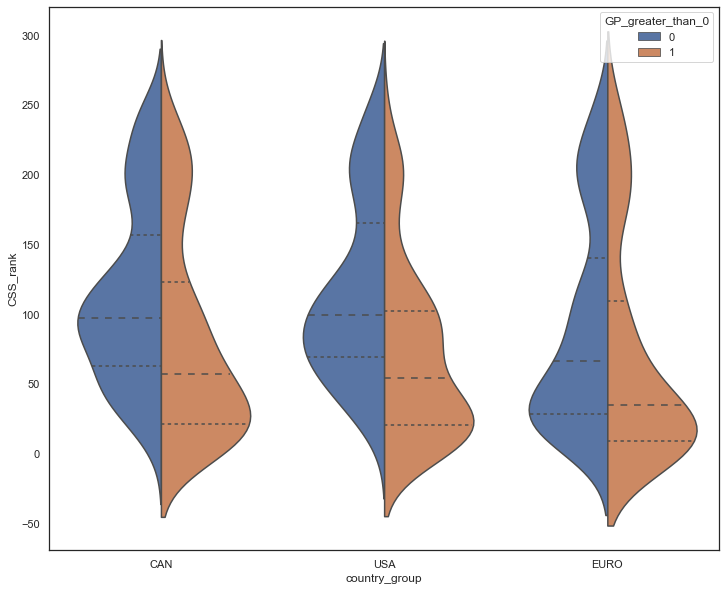

In [512]:
fig, axes = plt.subplots(figsize=(12,10))

_=sns.violinplot(x="country_group",y="CSS_rank", hue="GP_greater_than_0",
              data=trainv6, split=True, inner="quart", linewidth=1.5)

From the plot above we can see that drafting European players early on is more risky. We can also see that US born players ranked in the middle of the draft have a higher probability of playing in an NHL game than Canadian and European players. Out of the players that are ranked to be drafted the latest, Canadian players have the highest probability of playing in the NHL, with Europeans second and US born players third. 

C:\Users\seanf\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


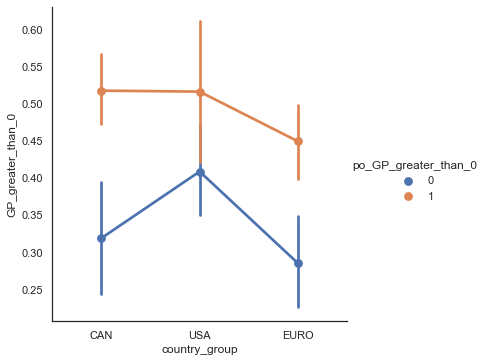

In [513]:
_=sns.factorplot(x='country_group',y='GP_greater_than_0',hue='po_GP_greater_than_0',
                      data=trainv6, split=True)

<AxesSubplot:xlabel='country_group', ylabel='GP_greater_than_0'>

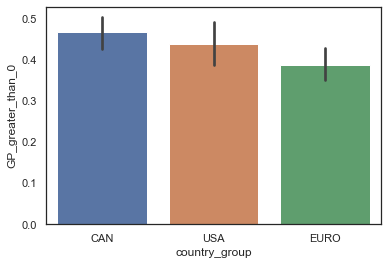

In [514]:
sns.barplot(x="country_group", y="GP_greater_than_0", data=trainv6)

We can see that although slight, there is a difference in probability of playing in the NHL between country groups. Overall, Canadians have the highest probability of playing in an NHL game. 

### Position

<AxesSubplot:xlabel='Position', ylabel='GP_greater_than_0'>

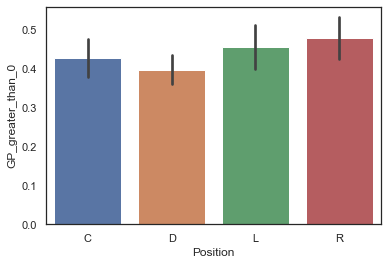

In [515]:
sns.barplot(x="Position", y="GP_greater_than_0", data=trainv6)

We can clearly see that Position contributes to a players chance of playing in the NHL. I was thinking of grouping left and right wingers into wingers, but it seems like there is still a noticeable difference, so we will leave them alone. Defenceman have the lowest chance of playing in the NHL, and it seems like teams can have the highest chances of success by drafting wingers. Since a good defenceman is very valuable in the NHL, it is important for teams to work hard at drafting the appropriate defenceman that fits their team. We will consider putting more emphahsis on defenceman by creating an indicator thats tells us when a player drafted is a defenceman and is on a playoff team. 

### Height and Weight

First, we will look at how weight contributes toward playing in the NHL.

C:\Users\seanf\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


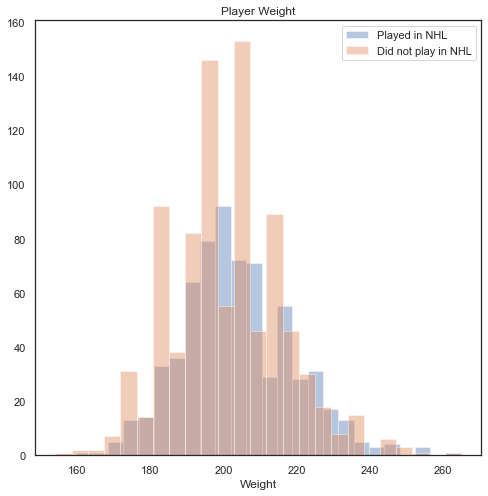

In [516]:
played = 'Played in NHL'
Nplayed = 'Did not play in NHL'
fig, axes = plt.subplots(figsize=(8,8))

ax = sns.distplot(trainv6[trainv6['GP_greater_than_0']==1].Weight, bins=25, label = played, kde =False)
ax = sns.distplot(trainv6[trainv6['GP_greater_than_0']==0].Weight, bins=25, label = Nplayed, kde =False)
ax.legend()
_=ax.set_title('Player Weight')

We will create a categorical feature based on player weight. We will group the players as follows: players < 200lbs, players between 200 and 220lbs, players > 220lbs.

In [517]:
bins = [0, 200, 220, np.inf]
names = ['<200', '200-220', '220+']

trainv6['Weight_group'] = pd.cut(trainv6['Weight'], bins, labels=names)

print(trainv6.dtypes)

po_GP_greater_than_0       uint8
GP_greater_than_0          uint8
id                         int64
DraftAge                   int64
country_group             object
Height                     int64
Weight                     int64
Position                  object
CSS_rank                   int64
rs_GP                      int64
rs_G                       int64
rs_A                       int64
rs_P                       int64
rs_PIM                     int64
rs_PlusMinus               int64
sum_7yr_GP                 int64
sum_7yr_TOI                int64
Weight_group            category
dtype: object


Now, we will have a look at player height vs weight and the target variable.

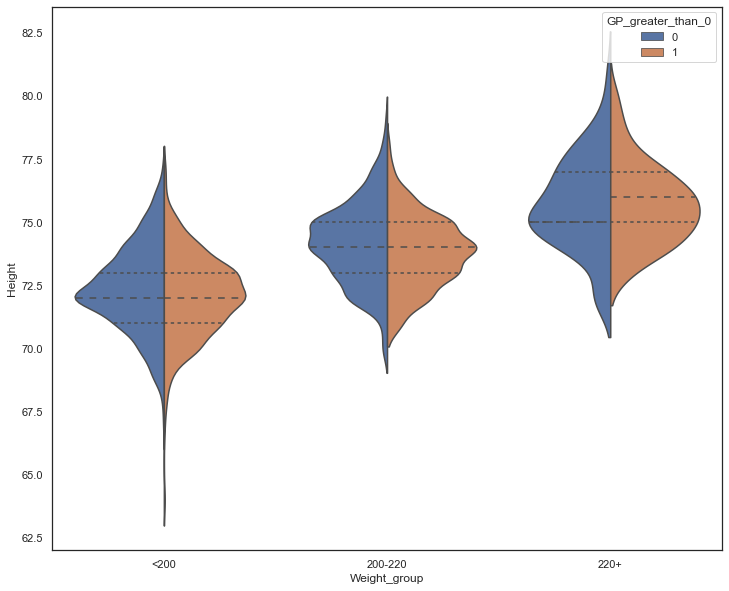

In [518]:
fig, axes = plt.subplots(figsize=(12,10))

_=sns.violinplot(x="Weight_group",y="Height", hue="GP_greater_than_0",
              data=trainv6, split=True, inner="quart", linewidth=1.5)

The violin plot above tells us that Height is correlated with Weight as expected, and that taller and heavier players have a better chance of playing in the NHL. I considered converting height from inches to cm and combining height and weight into one feature, but even after converting to cm they are not quite on the same scale. Therefore it is a risk because there would be a slight feature biased towards weight. However, it is a good idea to create groups for height as well. Let's have a further look:

C:\Users\seanf\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


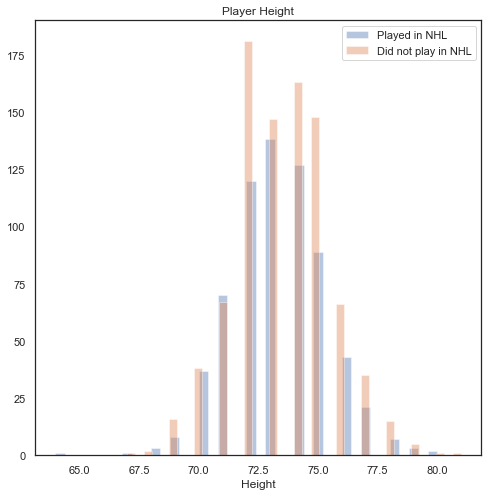

In [519]:
played = 'Played in NHL'
Nplayed = 'Did not play in NHL'
fig, axes = plt.subplots(figsize=(8,8))

ax = sns.distplot(trainv6[trainv6['GP_greater_than_0']==1].Height, bins=40, label = played, kde =False)
ax = sns.distplot(trainv6[trainv6['GP_greater_than_0']==0].Height, bins=40, label = Nplayed, kde =False)
ax.legend()
_=ax.set_title('Player Height')

The following groups will be created based on player height: <72 inches, 72-75 inches and 75+ inches. 

In [520]:
bins = [0, 72, 75, np.inf]
names = ['<72', '72-75', '75+']

trainv6['Height_group'] = pd.cut(trainv6['Height'], bins, labels=names)

print(trainv6.dtypes)

po_GP_greater_than_0       uint8
GP_greater_than_0          uint8
id                         int64
DraftAge                   int64
country_group             object
Height                     int64
Weight                     int64
Position                  object
CSS_rank                   int64
rs_GP                      int64
rs_G                       int64
rs_A                       int64
rs_P                       int64
rs_PIM                     int64
rs_PlusMinus               int64
sum_7yr_GP                 int64
sum_7yr_TOI                int64
Weight_group            category
Height_group            category
dtype: object


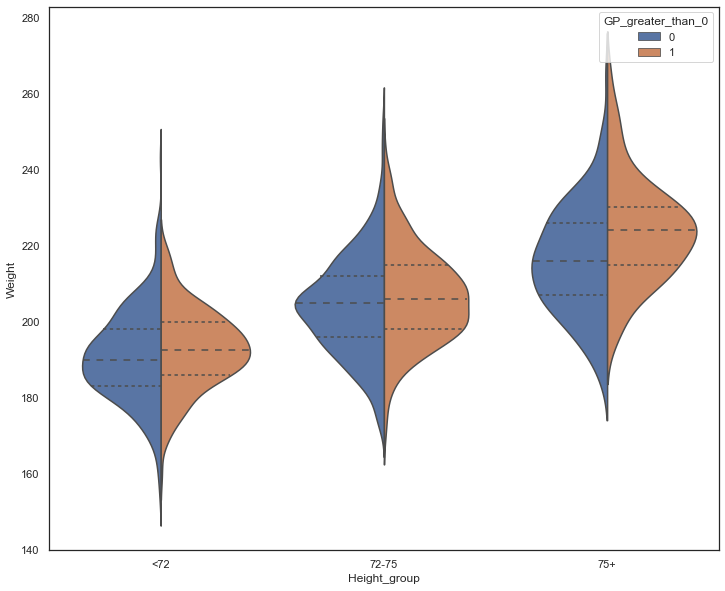

In [521]:
fig, axes = plt.subplots(figsize=(12,10))

_=sns.violinplot(x="Height_group",y="Weight", hue="GP_greater_than_0",
              data=trainv6, split=True, inner="quart", linewidth=1.5)

In [522]:
print(trainv6)

      po_GP_greater_than_0  GP_greater_than_0       id  DraftAge  \
334                      1                  1  8469733        19   
1437                     1                  0    46656        20   
1057                     1                  0    12653        20   
1655                     1                  0    15343        19   
1541                     0                  0     9420        19   
...                    ...                ...      ...       ...   
740                      0                  0    18444        19   
1032                     1                  1  8471778        19   
2121                     1                  1  8467383        18   
1424                     0                  0    11129        19   
1725                     1                  1  8471229        18   

     country_group  Height  Weight Position  CSS_rank  rs_GP  rs_G  rs_A  \
334            CAN      72     178        C       107     72    38    35   
1437           USA      71     

# Data Preprocessing

In [523]:
trainv6=trainv6.drop(['id'], axis=1)

In [524]:
print(trainv6)

      po_GP_greater_than_0  GP_greater_than_0  DraftAge country_group  Height  \
334                      1                  1        19           CAN      72   
1437                     1                  0        20           USA      71   
1057                     1                  0        20          EURO      74   
1655                     1                  0        19           CAN      75   
1541                     0                  0        19           USA      71   
...                    ...                ...       ...           ...     ...   
740                      0                  0        19          EURO      75   
1032                     1                  1        19           USA      75   
2121                     1                  1        18           CAN      72   
1424                     0                  0        19           CAN      71   
1725                     1                  1        18          EURO      73   

      Weight Position  CSS_

In [525]:
bins = [0, 19, np.inf]
names = ['<20', '20+']

trainv6['DraftAge_group'] = pd.cut(trainv6['DraftAge'], bins, labels=names)
print(trainv6)

      po_GP_greater_than_0  GP_greater_than_0  DraftAge country_group  Height  \
334                      1                  1        19           CAN      72   
1437                     1                  0        20           USA      71   
1057                     1                  0        20          EURO      74   
1655                     1                  0        19           CAN      75   
1541                     0                  0        19           USA      71   
...                    ...                ...       ...           ...     ...   
740                      0                  0        19          EURO      75   
1032                     1                  1        19           USA      75   
2121                     1                  1        18           CAN      72   
1424                     0                  0        19           CAN      71   
1725                     1                  1        18          EURO      73   

      Weight Position  CSS_

In [526]:
bins = [-1000, -10, 10, np.inf]
names = ['<-10', '-10-10', '10+']

trainv6['rs_PlusMinus_group'] = pd.cut(trainv6['rs_PlusMinus'], bins, labels=names)
print(trainv6)

      po_GP_greater_than_0  GP_greater_than_0  DraftAge country_group  Height  \
334                      1                  1        19           CAN      72   
1437                     1                  0        20           USA      71   
1057                     1                  0        20          EURO      74   
1655                     1                  0        19           CAN      75   
1541                     0                  0        19           USA      71   
...                    ...                ...       ...           ...     ...   
740                      0                  0        19          EURO      75   
1032                     1                  1        19           USA      75   
2121                     1                  1        18           CAN      72   
1424                     0                  0        19           CAN      71   
1725                     1                  1        18          EURO      73   

      Weight Position  CSS_

In [527]:
trainv6["rs_PIM_perGP"] = (trainv6["rs_PIM"] / trainv6["rs_GP"])

In [528]:
trainv6["rs_G_perGP"] = (trainv6["rs_G"] / trainv6["rs_GP"])

In [529]:
trainv6["rs_A_perGP"] = (trainv6["rs_A"] / trainv6["rs_GP"])

In [530]:
print(trainv6)

      po_GP_greater_than_0  GP_greater_than_0  DraftAge country_group  Height  \
334                      1                  1        19           CAN      72   
1437                     1                  0        20           USA      71   
1057                     1                  0        20          EURO      74   
1655                     1                  0        19           CAN      75   
1541                     0                  0        19           USA      71   
...                    ...                ...       ...           ...     ...   
740                      0                  0        19          EURO      75   
1032                     1                  1        19           USA      75   
2121                     1                  1        18           CAN      72   
1424                     0                  0        19           CAN      71   
1725                     1                  1        18          EURO      73   

      Weight Position  CSS_

In [531]:
bins = [0, 31, 61, 91, np.inf]
names = ['1-30', '31-60', '61-90', '91+']

trainv6['CSS_rank_group'] = pd.cut(trainv6['CSS_rank'], bins, labels=names)
print(trainv6)

      po_GP_greater_than_0  GP_greater_than_0  DraftAge country_group  Height  \
334                      1                  1        19           CAN      72   
1437                     1                  0        20           USA      71   
1057                     1                  0        20          EURO      74   
1655                     1                  0        19           CAN      75   
1541                     0                  0        19           USA      71   
...                    ...                ...       ...           ...     ...   
740                      0                  0        19          EURO      75   
1032                     1                  1        19           USA      75   
2121                     1                  1        18           CAN      72   
1424                     0                  0        19           CAN      71   
1725                     1                  1        18          EURO      73   

      Weight Position  CSS_

In [532]:
trainv6=trainv6.drop(['DraftAge','Height','Weight','rs_GP','rs_G','rs_A','rs_P','rs_PIM','rs_PlusMinus'], axis=1)

In [533]:
print(trainv6)

      po_GP_greater_than_0  GP_greater_than_0 country_group Position  \
334                      1                  1           CAN        C   
1437                     1                  0           USA        D   
1057                     1                  0          EURO        C   
1655                     1                  0           CAN        D   
1541                     0                  0           USA        D   
...                    ...                ...           ...      ...   
740                      0                  0          EURO        D   
1032                     1                  1           USA        L   
2121                     1                  1           CAN        L   
1424                     0                  0           CAN        C   
1725                     1                  1          EURO        C   

      CSS_rank  sum_7yr_GP  sum_7yr_TOI Weight_group Height_group  \
334        107          16          171         <200          <72 

In [534]:
trainv6['CSS_rank_po_I'] = (trainv6['CSS_rank'] <= 90) & (trainv6['CSS_rank'] > 30) & (trainv6['po_GP_greater_than_0'] > 0)

In [535]:
print(trainv6)

      po_GP_greater_than_0  GP_greater_than_0 country_group Position  \
334                      1                  1           CAN        C   
1437                     1                  0           USA        D   
1057                     1                  0          EURO        C   
1655                     1                  0           CAN        D   
1541                     0                  0           USA        D   
...                    ...                ...           ...      ...   
740                      0                  0          EURO        D   
1032                     1                  1           USA        L   
2121                     1                  1           CAN        L   
1424                     0                  0           CAN        C   
1725                     1                  1          EURO        C   

      CSS_rank  sum_7yr_GP  sum_7yr_TOI Weight_group Height_group  \
334        107          16          171         <200          <72 

In [536]:
trainv6=trainv6.drop(['CSS_rank','sum_7yr_GP','sum_7yr_TOI'], axis=1)

In [537]:
print(trainv6)

      po_GP_greater_than_0  GP_greater_than_0 country_group Position  \
334                      1                  1           CAN        C   
1437                     1                  0           USA        D   
1057                     1                  0          EURO        C   
1655                     1                  0           CAN        D   
1541                     0                  0           USA        D   
...                    ...                ...           ...      ...   
740                      0                  0          EURO        D   
1032                     1                  1           USA        L   
2121                     1                  1           CAN        L   
1424                     0                  0           CAN        C   
1725                     1                  1          EURO        C   

     Weight_group Height_group DraftAge_group rs_PlusMinus_group  \
334          <200          <72            <20             -10-10   

### Converting Features

In [538]:
trainv6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1556 entries, 334 to 1725
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   po_GP_greater_than_0  1556 non-null   uint8   
 1   GP_greater_than_0     1556 non-null   uint8   
 2   country_group         1556 non-null   object  
 3   Position              1556 non-null   object  
 4   Weight_group          1556 non-null   category
 5   Height_group          1556 non-null   category
 6   DraftAge_group        1556 non-null   category
 7   rs_PlusMinus_group    1556 non-null   category
 8   rs_PIM_perGP          1539 non-null   float64 
 9   rs_G_perGP            1541 non-null   float64 
 10  rs_A_perGP            1541 non-null   float64 
 11  CSS_rank_group        1556 non-null   category
 12  CSS_rank_po_I         1556 non-null   bool    
dtypes: bool(1), category(5), float64(3), object(2), uint8(2)
memory usage: 118.1+ KB


In [539]:
#convert bool to int

trainv7=pd.get_dummies(trainv6["CSS_rank_po_I"])
trainv8=pd.concat((trainv7, trainv6), axis=1)
trainv8=trainv8.drop(["CSS_rank_po_I"], axis=1)
trainv8=trainv8.drop(trainv8.columns[[0]], axis=1)
trainv9=trainv8.rename(columns={1: "CSS_rank_po_I"})
print(trainv9)
trainv9.info()

      CSS_rank_po_I  po_GP_greater_than_0  GP_greater_than_0 country_group  \
334               0                     1                  1           CAN   
1437              0                     1                  0           USA   
1057              0                     1                  0          EURO   
1655              1                     1                  0           CAN   
1541              0                     0                  0           USA   
...             ...                   ...                ...           ...   
740               0                     0                  0          EURO   
1032              0                     1                  1           USA   
2121              0                     1                  1           CAN   
1424              0                     0                  0           CAN   
1725              0                     1                  1          EURO   

     Position Weight_group Height_group DraftAge_group rs_PlusM

In [540]:
#object to int
country = {"CAN": 0,"USA": 1,"EURO": 2}
trainv9['country_group'] = trainv9['country_group'].map(country)
print(trainv9)
trainv9.info()

      CSS_rank_po_I  po_GP_greater_than_0  GP_greater_than_0  country_group  \
334               0                     1                  1              0   
1437              0                     1                  0              1   
1057              0                     1                  0              2   
1655              1                     1                  0              0   
1541              0                     0                  0              1   
...             ...                   ...                ...            ...   
740               0                     0                  0              2   
1032              0                     1                  1              1   
2121              0                     1                  1              0   
1424              0                     0                  0              0   
1725              0                     1                  1              2   

     Position Weight_group Height_group DraftAge_gr

In [541]:
#object to int
pos = {"C": 0,"L": 1,"R": 2,"D": 3}
trainv9['Position'] = trainv9['Position'].map(pos)
print(trainv9)
trainv9.info()

      CSS_rank_po_I  po_GP_greater_than_0  GP_greater_than_0  country_group  \
334               0                     1                  1              0   
1437              0                     1                  0              1   
1057              0                     1                  0              2   
1655              1                     1                  0              0   
1541              0                     0                  0              1   
...             ...                   ...                ...            ...   
740               0                     0                  0              2   
1032              0                     1                  1              1   
2121              0                     1                  1              0   
1424              0                     0                  0              0   
1725              0                     1                  1              2   

      Position Weight_group Height_group DraftAge_g

In [542]:
#cat to int
wt = {"<200": 0,"200-220": 1,"220+": 2}
trainv9['Weight_group'] = trainv9['Weight_group'].map(wt)
print(trainv9)
trainv9.info()

      CSS_rank_po_I  po_GP_greater_than_0  GP_greater_than_0  country_group  \
334               0                     1                  1              0   
1437              0                     1                  0              1   
1057              0                     1                  0              2   
1655              1                     1                  0              0   
1541              0                     0                  0              1   
...             ...                   ...                ...            ...   
740               0                     0                  0              2   
1032              0                     1                  1              1   
2121              0                     1                  1              0   
1424              0                     0                  0              0   
1725              0                     1                  1              2   

      Position Weight_group Height_group DraftAge_g

In [543]:
ht = {"<72": 0,"72-75": 1,"75+": 2}
trainv9['Height_group'] = trainv9['Height_group'].map(ht)
print(trainv9)
trainv9.info()

      CSS_rank_po_I  po_GP_greater_than_0  GP_greater_than_0  country_group  \
334               0                     1                  1              0   
1437              0                     1                  0              1   
1057              0                     1                  0              2   
1655              1                     1                  0              0   
1541              0                     0                  0              1   
...             ...                   ...                ...            ...   
740               0                     0                  0              2   
1032              0                     1                  1              1   
2121              0                     1                  1              0   
1424              0                     0                  0              0   
1725              0                     1                  1              2   

      Position Weight_group Height_group DraftAge_g

In [544]:
Da = {"<20": 0,"20+": 1}
trainv9['DraftAge_group'] = trainv9['DraftAge_group'].map(Da)
print(trainv9)
trainv9.info()

      CSS_rank_po_I  po_GP_greater_than_0  GP_greater_than_0  country_group  \
334               0                     1                  1              0   
1437              0                     1                  0              1   
1057              0                     1                  0              2   
1655              1                     1                  0              0   
1541              0                     0                  0              1   
...             ...                   ...                ...            ...   
740               0                     0                  0              2   
1032              0                     1                  1              1   
2121              0                     1                  1              0   
1424              0                     0                  0              0   
1725              0                     1                  1              2   

      Position Weight_group Height_group DraftAge_g

In [545]:
pm = {"<-10": 0,"-10-10": 1,"10+": 2}
trainv9['rs_PlusMinus_group'] = trainv9['rs_PlusMinus_group'].map(pm)
print(trainv9)
trainv9.info()

      CSS_rank_po_I  po_GP_greater_than_0  GP_greater_than_0  country_group  \
334               0                     1                  1              0   
1437              0                     1                  0              1   
1057              0                     1                  0              2   
1655              1                     1                  0              0   
1541              0                     0                  0              1   
...             ...                   ...                ...            ...   
740               0                     0                  0              2   
1032              0                     1                  1              1   
2121              0                     1                  1              0   
1424              0                     0                  0              0   
1725              0                     1                  1              2   

      Position Weight_group Height_group DraftAge_g

In [546]:
Cs = {"1-30": 0,"31-60": 1,"61-90": 2,"91+": 3}
trainv9['CSS_rank_group'] = trainv9['CSS_rank_group'].map(Cs)
print(trainv9)
trainv9.info()

      CSS_rank_po_I  po_GP_greater_than_0  GP_greater_than_0  country_group  \
334               0                     1                  1              0   
1437              0                     1                  0              1   
1057              0                     1                  0              2   
1655              1                     1                  0              0   
1541              0                     0                  0              1   
...             ...                   ...                ...            ...   
740               0                     0                  0              2   
1032              0                     1                  1              1   
2121              0                     1                  1              0   
1424              0                     0                  0              0   
1725              0                     1                  1              2   

      Position Weight_group Height_group DraftAge_g

In [547]:
trainv9['Weight_group'] = trainv9['Weight_group'].astype(int)

In [548]:
trainv9['Height_group'] = trainv9['Height_group'].astype(int)

In [549]:
trainv9['DraftAge_group'] = trainv9['DraftAge_group'].astype(int)

In [550]:
trainv9['rs_PlusMinus_group'] = trainv9['rs_PlusMinus_group'].astype(int)

In [551]:
trainv9['CSS_rank_group'] = trainv9['CSS_rank_group'].astype(int)

In [552]:
trainv9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1556 entries, 334 to 1725
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CSS_rank_po_I         1556 non-null   uint8  
 1   po_GP_greater_than_0  1556 non-null   uint8  
 2   GP_greater_than_0     1556 non-null   uint8  
 3   country_group         1556 non-null   int64  
 4   Position              1556 non-null   int64  
 5   Weight_group          1556 non-null   int32  
 6   Height_group          1556 non-null   int32  
 7   DraftAge_group        1556 non-null   int32  
 8   rs_PlusMinus_group    1556 non-null   int32  
 9   rs_PIM_perGP          1539 non-null   float64
 10  rs_G_perGP            1541 non-null   float64
 11  rs_A_perGP            1541 non-null   float64
 12  CSS_rank_group        1556 non-null   int32  
dtypes: float64(3), int32(5), int64(2), uint8(3)
memory usage: 140.2 KB


In [553]:
print(trainv9)

      CSS_rank_po_I  po_GP_greater_than_0  GP_greater_than_0  country_group  \
334               0                     1                  1              0   
1437              0                     1                  0              1   
1057              0                     1                  0              2   
1655              1                     1                  0              0   
1541              0                     0                  0              1   
...             ...                   ...                ...            ...   
740               0                     0                  0              2   
1032              0                     1                  1              1   
2121              0                     1                  1              0   
1424              0                     0                  0              0   
1725              0                     1                  1              2   

      Position  Weight_group  Height_group  DraftAg

# Test Data

In [554]:
print(test)

      GP_greater_than_0       id  DraftAge country_group  Height  Weight  \
219                   1  8473608        18           USA      73     190   
1680                  0    52111        18          EURO      73     176   
1980                  1  8470064        18           CAN      74     216   
1457                  0    22961        19          EURO      73     190   
1046                  0    13606        19           CAN      76     220   
...                 ...      ...       ...           ...     ...     ...   
574                   0     9594        20          EURO      71     196   
1990                  0     3456        19          EURO      75     209   
1611                  0    13528        18          EURO      74     198   
1508                  0     3303        18          EURO      72     194   
1701                  1  8467403        24          EURO      73     200   

     Position  CSS_rank  rs_GP  rs_G  ...  rs_P  rs_PIM  rs_PlusMinus  po_GP  \
219    

In [555]:
#convert po_GP to binary 1-played in at least one playoff game 0-did not play in the playoffs
testv1=pd.get_dummies(test["po_GP"])
testv2=pd.concat((testv1, test), axis=1)
testv2=testv2.drop(["po_GP","po_G","po_A","po_P","po_PIM"], axis=1)
testv2=testv2.drop(testv2.columns[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,
                                    16,17,18,19,20,21,22,23,24,25,26,27]], axis=1)
testv3=testv2.rename(columns={0: "po_GP_greater_than_0"})

In [556]:
#flip binary outcome

testv4=pd.get_dummies(testv3["po_GP_greater_than_0"])
testv5=pd.concat((testv4, testv3), axis=1)
testv5=testv5.drop(["po_GP_greater_than_0"], axis=1)
testv5=testv5.drop(testv5.columns[[1]], axis=1)
testv6=testv5.rename(columns={0: "po_GP_greater_than_0"})

In [557]:
bins = [0, 200, 220, np.inf]
names = ['<200', '200-220', '220+']

testv6['Weight_group'] = pd.cut(testv6['Weight'], bins, labels=names)

In [558]:
bins = [0, 72, 75, np.inf]
names = ['<72', '72-75', '75+']

testv6['Height_group'] = pd.cut(testv6['Height'], bins, labels=names)

In [559]:
testv6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 219 to 1701
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   po_GP_greater_than_0  668 non-null    uint8   
 1   GP_greater_than_0     668 non-null    uint8   
 2   id                    668 non-null    int64   
 3   DraftAge              668 non-null    int64   
 4   country_group         668 non-null    object  
 5   Height                668 non-null    int64   
 6   Weight                668 non-null    int64   
 7   Position              668 non-null    object  
 8   CSS_rank              668 non-null    int64   
 9   rs_GP                 668 non-null    int64   
 10  rs_G                  668 non-null    int64   
 11  rs_A                  668 non-null    int64   
 12  rs_P                  668 non-null    int64   
 13  rs_PIM                668 non-null    int64   
 14  rs_PlusMinus          668 non-null    int64   
 15  sum

In [560]:
bins = [0, 19, np.inf]
names = ['<20', '20+']

testv6['DraftAge_group'] = pd.cut(testv6['DraftAge'], bins, labels=names)

In [561]:
bins = [-1000, -10, 10, np.inf]
names = ['<-10', '-10-10', '10+']

testv6['rs_PlusMinus_group'] = pd.cut(testv6['rs_PlusMinus'], bins, labels=names)

In [562]:
testv6["rs_PIM_perGP"] = (testv6["rs_PIM"] / testv6["rs_GP"])

In [563]:
testv6["rs_G_perGP"] = (testv6["rs_G"] / testv6["rs_GP"])

In [564]:
testv6["rs_A_perGP"] = (testv6["rs_A"] / testv6["rs_GP"])

In [565]:
bins = [0, 31, 61, 91, np.inf]
names = ['1-30', '31-60', '61-90', '91+']

testv6['CSS_rank_group'] = pd.cut(testv6['CSS_rank'], bins, labels=names)

In [566]:
testv6=testv6.drop(['DraftAge','Height','Weight','rs_GP','rs_G','rs_A','rs_P','rs_PIM','rs_PlusMinus'], axis=1)

In [567]:
testv6['CSS_rank_po_I'] = (testv6['CSS_rank'] <= 90) & (testv6['CSS_rank'] > 30) & (testv6['po_GP_greater_than_0'] > 0)

In [568]:
testv6=testv6.drop(['CSS_rank','sum_7yr_GP','sum_7yr_TOI'], axis=1)

In [569]:
#convert bool to int

testv7=pd.get_dummies(testv6["CSS_rank_po_I"])
testv8=pd.concat((testv7, testv6), axis=1)
testv8=testv8.drop(["CSS_rank_po_I"], axis=1)
testv8=testv8.drop(testv8.columns[[0]], axis=1)
testv9=testv8.rename(columns={1: "CSS_rank_po_I"})

In [570]:
#object to int
country = {"CAN": 0,"USA": 1,"EURO": 2}
testv9['country_group'] = testv9['country_group'].map(country)

In [571]:
#object to int
pos = {"C": 0,"L": 1,"R": 2,"D": 3}
testv9['Position'] = testv9['Position'].map(pos)

In [572]:
#cat to int
wt = {"<200": 0,"200-220": 1,"220+": 2}
testv9['Weight_group'] = testv9['Weight_group'].map(wt)

In [573]:
ht = {"<72": 0,"72-75": 1,"75+": 2}
testv9['Height_group'] = testv9['Height_group'].map(ht)

In [574]:
Da = {"<20": 0,"20+": 1}
testv9['DraftAge_group'] = testv9['DraftAge_group'].map(Da)

In [575]:
pm = {"<-10": 0,"-10-10": 1,"10+": 2}
testv9['rs_PlusMinus_group'] = testv9['rs_PlusMinus_group'].map(pm)

In [576]:
Cs = {"1-30": 0,"31-60": 1,"61-90": 2,"91+": 3}
testv9['CSS_rank_group'] = testv9['CSS_rank_group'].map(Cs)

In [577]:
testv9['Weight_group'] = testv9['Weight_group'].astype(int)

In [578]:
testv9['Height_group'] = testv9['Height_group'].astype(int)

In [579]:
testv9['DraftAge_group'] = testv9['DraftAge_group'].astype(int)

In [580]:
testv9['rs_PlusMinus_group'] = testv9['rs_PlusMinus_group'].astype(int)

In [581]:
testv9['CSS_rank_group'] = testv9['CSS_rank_group'].astype(int)

In [582]:
print(testv9)
testv9.info()

      CSS_rank_po_I  po_GP_greater_than_0  GP_greater_than_0       id  \
219               0                     0                  1  8473608   
1680              0                     0                  0    52111   
1980              0                     1                  1  8470064   
1457              0                     1                  0    22961   
1046              0                     0                  0    13606   
...             ...                   ...                ...      ...   
574               0                     0                  0     9594   
1990              0                     0                  0     3456   
1611              0                     0                  0    13528   
1508              0                     0                  0     3303   
1701              0                     1                  1  8467403   

      country_group  Position  Weight_group  Height_group  DraftAge_group  \
219               1         0             0   

# Machine Learning Models

In [812]:
np.any(np.isnan(trainv9))

True

In [813]:
np.all(np.isfinite(trainv9))

False

In [814]:
np.any(np.isnan(testv9))

True

In [815]:
np.all(np.isfinite(testv9))

False

In [816]:
trainv10 = trainv9.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
testv10 = testv9.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

In [817]:
np.all(np.isfinite(trainv10))

True

In [818]:
np.any(np.isnan(trainv10))

False

In [819]:
X_train = trainv10.drop(["GP_greater_than_0"], axis=1)
Y_train = trainv10["GP_greater_than_0"]
X_test = testv10.drop(["id","GP_greater_than_0"], axis=1).copy()

In [820]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

In [821]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  

Y_pred = decision_tree.predict(X_test)  

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [822]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [823]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

In [824]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  

Y_pred = knn.predict(X_test)  

acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

In [825]:
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  

Y_pred = gaussian.predict(X_test)  

acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

In [826]:
perceptron = Perceptron(max_iter=10)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

In [827]:
linear_svc = LinearSVC(max_iter=5000)
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

# Best Model

In [828]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
100.00,Random Forest
100.00,Decision Tree
80.38,KNN
68.16,Naive Bayes
66.80,Support Vector Machines
66.80,Logistic Regression
47.69,Perceptron
47.37,Stochastic Gradient Decent


We can see that the Random Forest and Decision Tree perform the best. We decided to assume that we do not have a labelled test set, as this is always more likely to happen. So, we get a high accuracy for the Decision Tree and Random Forest as there is overfitting. Lets see how Random Forest performs when we use cross validation.

# K-Fold Cross Validation

In [883]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=20, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.77922078 0.66233766 0.72727273 0.57142857 0.68831169 0.64935065
 0.62337662 0.58441558 0.61038961 0.64935065 0.63636364 0.63636364
 0.67532468 0.58441558 0.74025974 0.68831169 0.63636364 0.55844156
 0.62337662 0.73684211]
Mean: 0.6530758714969241
Standard Deviation: 0.05856692712309009


We get a much lower accuracy of 65% after cross validation, making it necessary to cross validate with our other algorithms. 

In [863]:
from sklearn.model_selection import cross_val_score
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
scores = cross_val_score(sgd, X_train, Y_train, cv=20, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.5974026  0.61038961 0.44155844 0.53246753 0.63636364 0.45454545
 0.55844156 0.62337662 0.53246753 0.53246753 0.51948052 0.5974026
 0.58441558 0.51948052 0.62337662 0.67532468 0.62337662 0.42857143
 0.55844156 0.57894737]
Mean: 0.561414900888585
Standard Deviation: 0.06535221443486654


In [864]:
from sklearn.model_selection import cross_val_score
decision_tree = DecisionTreeClassifier() 
scores = cross_val_score(decision_tree, X_train, Y_train, cv=20, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.77922078 0.5974026  0.68831169 0.46753247 0.57142857 0.57142857
 0.50649351 0.57142857 0.61038961 0.55844156 0.62337662 0.64935065
 0.67532468 0.53246753 0.64935065 0.5974026  0.68831169 0.58441558
 0.5974026  0.59210526]
Mean: 0.6055792891319207
Standard Deviation: 0.06842802315508596


In [865]:
from sklearn.model_selection import cross_val_score
logreg = LogisticRegression()
scores = cross_val_score(logreg, X_train, Y_train, cv=20, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.80519481 0.71428571 0.64935065 0.57142857 0.63636364 0.64935065
 0.5974026  0.67532468 0.66233766 0.66233766 0.67532468 0.61038961
 0.66233766 0.54545455 0.67532468 0.75324675 0.76623377 0.64935065
 0.66233766 0.67105263]
Mean: 0.6647214627477787
Standard Deviation: 0.060272647538903976


In [871]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors = 3) 
scores = cross_val_score(knn, X_train, Y_train, cv=20, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.71428571 0.5974026  0.67532468 0.64935065 0.55844156 0.63636364
 0.62337662 0.58441558 0.55844156 0.63636364 0.61038961 0.61038961
 0.72727273 0.58441558 0.68831169 0.7012987  0.63636364 0.5974026
 0.53246753 0.61842105]
Mean: 0.6270249487354751
Standard Deviation: 0.052156017951995634


In [876]:
from sklearn.model_selection import cross_val_score
gaussian = GaussianNB() 
scores = cross_val_score(gaussian, X_train, Y_train, cv=20, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.79220779 0.67532468 0.68831169 0.55844156 0.63636364 0.64935065
 0.58441558 0.67532468 0.64935065 0.53246753 0.67532468 0.63636364
 0.66233766 0.62337662 0.72727273 0.81818182 0.72727273 0.64935065
 0.64935065 0.75      ]
Mean: 0.6680194805194806
Standard Deviation: 0.06894956583944874


In [879]:
from sklearn.model_selection import cross_val_score
perceptron = Perceptron(max_iter=100)
scores = cross_val_score(perceptron, X_train, Y_train, cv=20, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.5974026  0.48051948 0.53246753 0.48051948 0.51948052 0.62337662
 0.5974026  0.57142857 0.57142857 0.50649351 0.48051948 0.58441558
 0.66233766 0.62337662 0.45454545 0.41558442 0.62337662 0.41558442
 0.61038961 0.43421053]
Mean: 0.539242993848257
Standard Deviation: 0.07515641377428257


In [881]:
from sklearn.model_selection import cross_val_score
linear_svc = LinearSVC(max_iter=5000)
scores = cross_val_score(linear_svc, X_train, Y_train, cv=20, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.80519481 0.71428571 0.64935065 0.58441558 0.63636364 0.61038961
 0.61038961 0.68831169 0.64935065 0.64935065 0.67532468 0.61038961
 0.66233766 0.54545455 0.66233766 0.75324675 0.76623377 0.64935065
 0.66233766 0.67105263]
Mean: 0.6627734107997265
Standard Deviation: 0.06010811337143514


It is very interesting to see that after we cross validate, the gaussian Naive Bayes performs best on the training data with a mean accuracy of 66.8% and standard deviation 0.069. Next, we will try to see if we can improve this accuracy. 

[0.00077973 0.02183236 0.00324886 0.         0.00441845 0.00298895
 0.01481481 0.03950617 0.00337882 0.00532814 0.02352177 0.07810266]


Since the mean accuracy for our Random Forest is quite similar to the Naive Bayes, we can still turn to Random Forest to look at feature importance in a convenient way.

In [887]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
rs_A_perGP,0.224
rs_G_perGP,0.196
rs_PIM_perGP,0.190
CSS_rank_group,0.094
Position,0.056
country_group,0.052
Weight_group,0.044
rs_PlusMinus_group,0.042
Height_group,0.038


<AxesSubplot:xlabel='feature'>

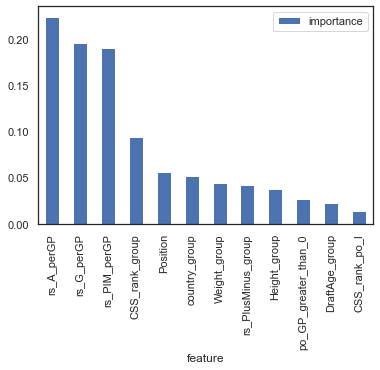

In [888]:
importances.plot.bar()

CSS_rank_po_I does not play a significant role in our random forest. Therefore we will drop it from the data and train again. 

# Model Retraining 

### Random Forest and Gaussian Naive Bayes

In [889]:
trainv11 = trainv10.drop("CSS_rank_po_I", axis=1)
testv11 = testv10.drop("CSS_rank_po_I", axis=1)

In [890]:
X_train = trainv11.drop(["GP_greater_than_0"], axis=1)
Y_train = trainv11["GP_greater_than_0"]
X_test = testv11.drop(["id","GP_greater_than_0"], axis=1).copy()

In [891]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [892]:
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  

Y_pred = gaussian.predict(X_test)  

acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

In [893]:
print(round(acc_random_forest,2,), "%")
print(round(acc_gaussian,2,), "%")

100.0 %
68.1 %


In [896]:
#### K-fold Cross Validation
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=20, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.77922078 0.63636364 0.64935065 0.61038961 0.66233766 0.61038961
 0.64935065 0.63636364 0.61038961 0.5974026  0.66233766 0.61038961
 0.66233766 0.5974026  0.75324675 0.67532468 0.67532468 0.55844156
 0.64935065 0.75      ]
Mean: 0.6517857142857143
Standard Deviation: 0.054588679147273965


In [897]:
from sklearn.model_selection import cross_val_score
gaussian = GaussianNB() 
scores = cross_val_score(gaussian, X_train, Y_train, cv=20, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.79220779 0.67532468 0.68831169 0.55844156 0.63636364 0.61038961
 0.58441558 0.67532468 0.66233766 0.53246753 0.67532468 0.64935065
 0.66233766 0.62337662 0.72727273 0.80519481 0.74025974 0.64935065
 0.66233766 0.75      ]
Mean: 0.6680194805194806
Standard Deviation: 0.06882714855938747


#### Decision Tree

In [899]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  

Y_pred = decision_tree.predict(X_test)  

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

100.0 %


In [900]:
#### K-fold 
from sklearn.model_selection import cross_val_score
decision_tree = DecisionTreeClassifier() 
scores = cross_val_score(decision_tree, X_train, Y_train, cv=20, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.79220779 0.58441558 0.68831169 0.46753247 0.57142857 0.55844156
 0.54545455 0.54545455 0.66233766 0.5974026  0.66233766 0.63636364
 0.68831169 0.54545455 0.71428571 0.62337662 0.67532468 0.55844156
 0.57142857 0.63157895]
Mean: 0.6159945317840055
Standard Deviation: 0.07369124836246807


We can see that the gaussian naive bayes algorithm still performs the best after dropping the CSS_rank_po_I feature. We will now try dropping some other features to see if overfitting can be avoided.

# Model Retraining II

In [902]:
trainv12 = trainv11.drop(["po_GP_greater_than_0", "DraftAge_group"], axis=1)
testv12 = testv11.drop(["po_GP_greater_than_0", "DraftAge_group"], axis=1)

In [903]:
X_train = trainv12.drop(["GP_greater_than_0"], axis=1)
Y_train = trainv12["GP_greater_than_0"]
X_test = testv12.drop(["id","GP_greater_than_0"], axis=1).copy()

In [904]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [905]:
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  

Y_pred = gaussian.predict(X_test)  

acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

In [906]:
print(round(acc_random_forest,2,), "%")
print(round(acc_gaussian,2,), "%")

100.0 %
66.02 %


In [907]:
#### K-fold Cross Validation
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=20, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.74025974 0.63636364 0.66233766 0.63636364 0.71428571 0.66233766
 0.62337662 0.54545455 0.55844156 0.64935065 0.61038961 0.5974026
 0.72727273 0.62337662 0.71428571 0.68831169 0.66233766 0.58441558
 0.64935065 0.73684211]
Mean: 0.6511278195488722
Standard Deviation: 0.05548134380283678


In [908]:
from sklearn.model_selection import cross_val_score
gaussian = GaussianNB() 
scores = cross_val_score(gaussian, X_train, Y_train, cv=20, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.71428571 0.75324675 0.68831169 0.57142857 0.62337662 0.7012987
 0.5974026  0.68831169 0.57142857 0.55844156 0.61038961 0.61038961
 0.64935065 0.64935065 0.74025974 0.75324675 0.68831169 0.62337662
 0.5974026  0.77631579]
Mean: 0.6582963089542038
Standard Deviation: 0.06558679477354512


In [909]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  

Y_pred = decision_tree.predict(X_test)  

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [910]:
#### K-fold 
from sklearn.model_selection import cross_val_score
decision_tree = DecisionTreeClassifier() 
scores = cross_val_score(decision_tree, X_train, Y_train, cv=20, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.63636364 0.53246753 0.5974026  0.54545455 0.53246753 0.58441558
 0.53246753 0.62337662 0.72727273 0.46753247 0.57142857 0.51948052
 0.68831169 0.54545455 0.64935065 0.57142857 0.63636364 0.57142857
 0.55844156 0.60526316]
Mean: 0.5848086124401913
Standard Deviation: 0.06046696293242035


# A Different Approach to Training and Testing 

### Clean Data

We will now start cleaning the data beginning with the original dataset, and this time not removing labels from the test data.

In [1105]:
draft_data = pd.read_csv (r'C:\Users\seanf\OneDrive\Documents\SUMMER RESEARCH PROJECT\data\playerstats.csv')
draft_data=draft_data.drop(['PlayerName','Country','Overall','DraftYear'], axis=1)

In [1106]:
#convert GP_greater_than_0 to binary 0-No 1-Yes
draft_data_1=pd.get_dummies(draft_data["GP_greater_than_0"])
draft_data_2=pd.concat((draft_data_1, draft_data), axis=1)
draft_data_2=draft_data_2.drop(["GP_greater_than_0"], axis=1)
draft_data_2=draft_data_2.drop(["no"], axis=1)
draft_data_v=draft_data_2.rename(columns={"yes": "GP_greater_than_0"})

In [1107]:
#convert po_GP to binary 1-played in at least one playoff game 0-did not play in the playoffs
dr=pd.get_dummies(draft_data_v["po_GP"])
dr2=pd.concat((dr, draft_data_v), axis=1)
dr2=dr2.drop(["po_GP","po_G","po_A","po_P","po_PIM"], axis=1)
dr2=dr2.drop(dr2.columns[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,
                                    16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]], axis=1)
dr3=dr2.rename(columns={0: "po_GP_greater_than_0"})

In [1108]:
#flip binary outcome

dr4=pd.get_dummies(dr3["po_GP_greater_than_0"])
dr5=pd.concat((dr4, dr3), axis=1)
dr5=dr5.drop(["po_GP_greater_than_0"], axis=1)
dr5=dr5.drop(dr5.columns[[1]], axis=1)
dr6=dr5.rename(columns={0: "po_GP_greater_than_0"})

In [1109]:
bins = [0, 200, 220, np.inf]
names = ['<200', '200-220', '220+']

dr6['Weight_group'] = pd.cut(dr6['Weight'], bins, labels=names)

In [1110]:
bins = [0, 72, 75, np.inf]
names = ['<72', '72-75', '75+']

dr6['Height_group'] = pd.cut(dr6['Height'], bins, labels=names)

In [1111]:
bins = [0, 19, np.inf]
names = ['<20', '20+']

dr6['DraftAge_group'] = pd.cut(dr6['DraftAge'], bins, labels=names)

In [1112]:
bins = [-1000, -10, 10, np.inf]
names = ['<-10', '-10-10', '10+']

dr6['rs_PlusMinus_group'] = pd.cut(dr6['rs_PlusMinus'], bins, labels=names)

In [1113]:
dr6["rs_PIM_perGP"] = (dr6["rs_PIM"] / dr6["rs_GP"])

In [1114]:
dr6["rs_G_perGP"] = (dr6["rs_G"] / dr6["rs_GP"])

In [1115]:
dr6["rs_A_perGP"] = (dr6["rs_A"] / dr6["rs_GP"])

In [1116]:
bins = [0, 31, 61, 91, np.inf]
names = ['1-30', '31-60', '61-90', '91+']

dr6['CSS_rank_group'] = pd.cut(dr6['CSS_rank'], bins, labels=names)

In [1117]:
dr6=dr6.drop(['DraftAge','Height','Weight','rs_GP','rs_G','rs_A','rs_P','rs_PIM','rs_PlusMinus'], axis=1)

In [1118]:
dr6['CSS_rank_po_I'] = (dr6['CSS_rank'] <= 90) & (dr6['CSS_rank'] > 30) & (dr6['po_GP_greater_than_0'] > 0)

In [1119]:
dr6=dr6.drop(['CSS_rank','sum_7yr_GP','sum_7yr_TOI','id'], axis=1)

In [1120]:
#convert bool to int

dr7=pd.get_dummies(dr6["CSS_rank_po_I"])
dr8=pd.concat((dr7, dr6), axis=1)
dr8=dr8.drop(["CSS_rank_po_I"], axis=1)
dr8=dr8.drop(dr8.columns[[0]], axis=1)
dr9=dr8.rename(columns={1: "CSS_rank_po_I"})

In [1121]:
#object to int
country = {"CAN": 0,"USA": 1,"EURO": 2}
dr9['country_group'] = dr9['country_group'].map(country)

In [1122]:
#object to int
pos = {"C": 0,"L": 1,"R": 2,"D": 3}
dr9['Position'] = dr9['Position'].map(pos)

In [1123]:
#cat to int
wt = {"<200": 0,"200-220": 1,"220+": 2}
dr9['Weight_group'] = dr9['Weight_group'].map(wt)

In [1124]:
ht = {"<72": 0,"72-75": 1,"75+": 2}
dr9['Height_group'] = dr9['Height_group'].map(ht)

In [1125]:
Da = {"<20": 0,"20+": 1}
dr9['DraftAge_group'] = dr9['DraftAge_group'].map(Da)

In [1126]:
pm = {"<-10": 0,"-10-10": 1,"10+": 2}
dr9['rs_PlusMinus_group'] = dr9['rs_PlusMinus_group'].map(pm)

In [1127]:
Cs = {"1-30": 0,"31-60": 1,"61-90": 2,"91+": 3}
dr9['CSS_rank_group'] = dr9['CSS_rank_group'].map(Cs)

In [1128]:
dr9['Weight_group'] = dr9['Weight_group'].astype(int)

In [1129]:
dr9['Height_group'] = dr9['Height_group'].astype(int)

In [1130]:
dr9['DraftAge_group'] = dr9['DraftAge_group'].astype(int)

In [1131]:
dr9['rs_PlusMinus_group'] = dr9['rs_PlusMinus_group'].astype(int)

In [1132]:
dr9['CSS_rank_group'] = dr9['CSS_rank_group'].astype(int)

In [1133]:
np.any(np.isnan(dr9))

True

In [1134]:
np.all(np.isfinite(dr9))

False

In [1135]:
dr10 = dr9.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

In [1136]:
np.any(np.isnan(dr10))

False

In [1137]:
np.all(np.isfinite(dr10))

True

In [1171]:
print(dr10)

      CSS_rank_po_I  po_GP_greater_than_0  GP_greater_than_0  country_group  \
0                 0                     1                  0              1   
1                 0                     0                  0              1   
2                 0                     1                  0              0   
3                 0                     0                  1              0   
4                 1                     1                  0              0   
...             ...                   ...                ...            ...   
2219              0                     0                  0              2   
2220              1                     1                  0              2   
2221              0                     1                  0              2   
2222              1                     1                  1              2   
2223              1                     1                  1              2   

      Position  Weight_group  Height_group  DraftAg

# Train and Test Split using sklearn

In [1139]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [1178]:
dr10 = dr10[['CSS_rank_po_I','po_GP_greater_than_0','country_group','Position',
            'Weight_group','Height_group','DraftAge_group','rs_PlusMinus_group',
            'rs_PIM_perGP','rs_G_perGP','rs_A_perGP','CSS_rank_group','GP_greater_than_0']]
dr10

,CSS_rank_po_I,po_GP_greater_than_0,country_group,Position,Weight_group,Height_group,DraftAge_group,rs_PlusMinus_group,rs_PIM_perGP,rs_G_perGP,rs_A_perGP,CSS_rank_group,GP_greater_than_0
0,0,1,1,0,1,1,0,0,1.382353,0.382353,0.426471,0,0
1,0,0,1,3,1,1,0,2,1.219512,0.268293,0.439024,0,0
2,0,1,0,2,1,1,0,1,1.628571,0.085714,0.057143,3,0
3,0,0,0,0,0,0,0,2,0.557143,0.300000,0.257143,3,1
4,1,1,0,3,1,1,0,1,3.573529,0.073529,0.088235,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,0,0,2,2,0,0,1,0,0.327273,0.163636,0.109091,2,0
2220,1,1,2,1,2,1,0,1,0.588235,0.196078,0.196078,2,0
2221,0,1,2,2,0,1,0,2,2.986667,0.253333,0.320000,0,0
2222,1,1,2,1,0,1,0,1,0.568182,0.409091,0.340909,1,1


In [1190]:
dr10 = dr10.drop(["CSS_rank_po_I", "po_GP_greater_than_0", "DraftAge_group"], axis=1)

In [1191]:
dr11 = dr10.values

In [1192]:
X = dr11[:, :-1]
print(X)

[[1.         0.         1.         ... 0.38235294 0.42647059 0.        ]
 [1.         3.         1.         ... 0.26829268 0.43902439 0.        ]
 [0.         2.         1.         ... 0.08571429 0.05714286 3.        ]
 ...
 [2.         2.         0.         ... 0.25333333 0.32       0.        ]
 [2.         1.         0.         ... 0.40909091 0.34090909 1.        ]
 [2.         3.         1.         ... 0.14       0.06       2.        ]]


In [1193]:
Y = dr11[:,-1]
print(Y)

[0. 0. 0. ... 0. 1. 1.]


In [1194]:
print(X.shape, Y.shape)

(2201, 9) (2201,)


In [1195]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

In [1196]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1474, 9) (727, 9) (1474,) (727,)


### Fit Models

In [1213]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

acc_sgd = accuracy_score(Y_test, Y_pred)
print('Accuracy: %.3f' % acc_sgd)

Accuracy: 0.598


In [1214]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  

Y_pred = decision_tree.predict(X_test)  

acc_dt = accuracy_score(Y_test, Y_pred)
print('Accuracy: %.3f' % acc_dt)

Accuracy: 0.601


In [1232]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test)

acc_rf = accuracy_score(Y_test, Y_pred)
print('Accuracy: %.3f' % acc_rf)

Accuracy: 0.674


In [1256]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = accuracy_score(Y_test, Y_pred)
print('Accuracy: %.3f' % acc_log)

Accuracy: 0.677


In [1234]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  

Y_pred = knn.predict(X_test)  

acc_knn = accuracy_score(Y_test, Y_pred)
print('Accuracy: %.3f' % acc_knn)

Accuracy: 0.619


In [1236]:
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  

Y_pred = gaussian.predict(X_test)  

acc_gaussian = accuracy_score(Y_test, Y_pred)
print('Accuracy: %.3f' % acc_gaussian)

Accuracy: 0.670


In [1237]:
perceptron = Perceptron(max_iter=10)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = accuracy_score(Y_test, Y_pred)
print('Accuracy: %.3f' % acc_perceptron)

Accuracy: 0.578


In [1239]:
linear_svc = LinearSVC(max_iter=5000)
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = accuracy_score(Y_test, Y_pred)
print('Accuracy: %.3f' % acc_linear_svc)

Accuracy: 0.674


Logistic Regression performs best when evaluating algorithms on labelled test data with 67.7% accuracy. 

### Hyperparameter Tuning

We will now see if we can improve our random forest by using hyperparameter tuning.

In [1242]:
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}
from sklearn.model_selection import GridSearchCV, cross_val_score
rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
clf.fit(X_train, Y_train)
clf.best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 1,
 'min_samples_split': 35,
 'n_estimators': 1500}

#### Test new Parameters

In [1246]:
rf = RandomForestClassifier(criterion = "entropy",
    min_samples_leaf = 1, min_samples_split = 35, n_estimators = 1500,
    max_features = 'auto', random_state = 1, n_jobs = -1)

rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_test)

acc_rf = accuracy_score(Y_test, Y_pred)
print('Accuracy: %.3f' % acc_rf)

Accuracy: 0.671


Even after hyperparameter tuning, we can see that the accuracy of our logistic regression is still higher. Now, lets see if we can improve our logistic regression model. 

In [1252]:
from sklearn.model_selection import RepeatedStratifiedKFold

logreg = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c = [100, 10, 1.0, 0.1, 0.01]

grid = dict(solver=solvers,penalty=penalty,C=c)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=logreg, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.633666 using {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
0.623937 (0.034900) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.623937 (0.034900) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.623937 (0.034900) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.623937 (0.034900) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.623937 (0.034900) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.623937 (0.034900) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.622585 (0.036090) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.622585 (0.036090) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.622136 (0.036211) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.621668 (0.034922) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.621668 (0.034922) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.623482 (0.033786) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.626629 (0.036243) wi

In [1258]:
logreg = LogisticRegression(penalty='l2', C=0.01, solver='liblinear')
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = accuracy_score(Y_test, Y_pred)
print('Accuracy: %.3f' % acc_log)

Accuracy: 0.666


In [1257]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = accuracy_score(Y_test, Y_pred)
print('Accuracy: %.3f' % acc_log)

Accuracy: 0.677


It seems that hyperparameter tuning in this case was not quite useful. This may be due to the fact that we are tuning on the training data but then using the labelled test data to measure accuracy. However, we culd refit the logistic regression model on the whole dataset and make this our final model for new, unseen, future cases. For now, we will look at further evaluating our logistic regression model.

#### Further Evaluation: Confusion Matrix, Precision and Recall, F-Score, ROC AUC

In [1261]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(logreg, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[660, 163],
       [374, 277]], dtype=int64)

660 draft selections were correctly classified as having not played in the NHL and 163 draft selections were wrongly classified as having not played in the NHL. 374 draft selections were wrongly classified as having played in the NHL and 277 draft selections were correctly classified as having played in the NHL.

In [1262]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

Precision: 0.6295454545454545
Recall: 0.4254992319508449


Our model predicts 63% of the time that a draft selection will play in the NHL or not correctly. The model predicted that a draft selection will play in the NHL with 43% of those who actually did play. 

In [1263]:
from sklearn.metrics import f1_score
f1_score(Y_train, predictions)

0.5077910174152154

The F-score is 51% 

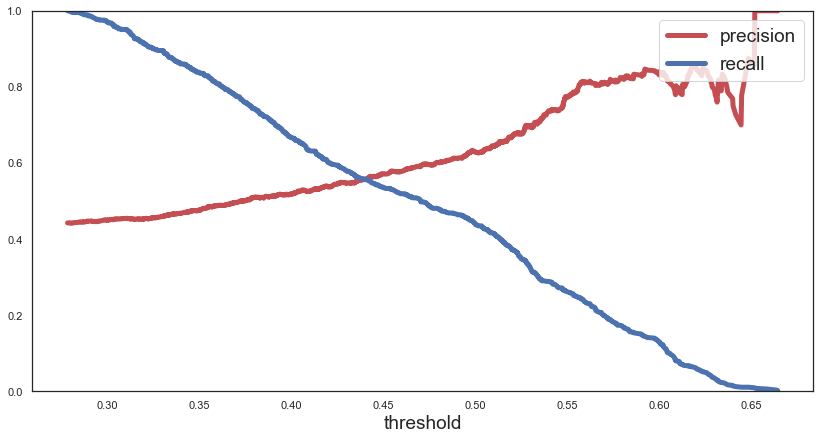

In [1264]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = logreg.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

Based on the precision recall curve, it seems like the optimal threshold is about 0.51.

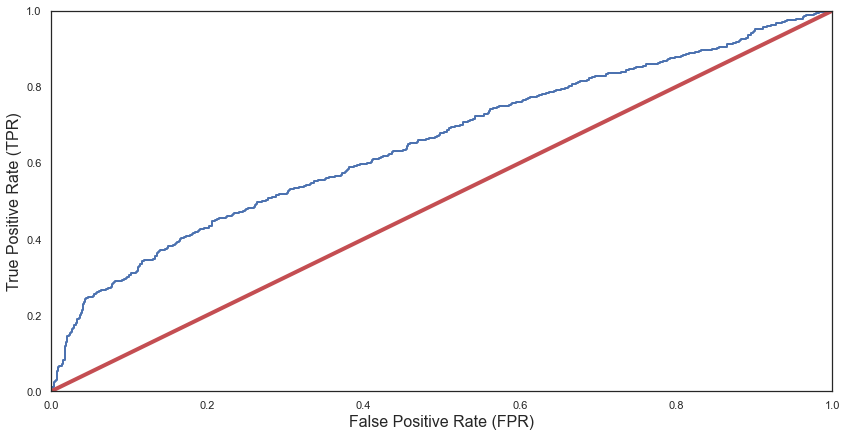

In [1266]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

We can see that the logistic regression model does not do a great job, but it is better than just guessing. 

In [1267]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.6505180365565266


A random classifier would have a score of 0.5, so this is pretty good considering the difficulty of the problem. It is very difficult to determine if a player will have a successful NHL career from the time he is drafted. 

#### Fixing Threshold in Logistic Regression, Final Model

In [1320]:
clf = LogisticRegression(class_weight="balanced")
clf.fit(X_train, Y_train)
THRESHOLD = 0.69
preds = np.where(clf.predict_proba(X_train)[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[accuracy_score(Y_train, preds), recall_score(Y_train, preds),
                   precision_score(Y_train, preds), roc_auc_score(Y_train, preds)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,0.620760
recall,0.184332
precision,0.810811
roc_auc_score,0.575155


When fixing the threshold to 0.69, we get a precision of about 81%. In this project, we want the precision to be as high as possible since we would like to know whether a player will play in the NHL or not at the time they are drafted. So after fixing the threshold, we now have a model that predicts 81% of the time a draft selection plays in the NHL or not correctly.  

In [1323]:
clf.coef_


array([[-0.17948996,  0.04258293,  0.24042815, -0.0086418 , -0.09797584,
        -0.01760067,  0.20567971,  1.13873377, -0.37790019]])

As seen in the feature importance plot in random forest, we can also see that rs_A_perGP is the most important feature in logistic regression as it contributes the most, with a coefficient estimate of 1.14. This suggests that players who get more assists in their draft year have higher probability of playing in the NHL. From this analysis, it is recommended that teams target players who are tall and strong and have playmaking ability. There were also some notable results that we saw in the EDA, which also lead to further insights. There is room for improvement here as this project is very rough, and I would start with more data collection and more careful preprocessing by considering one-hot encoding and ordinal encoding for specific features. It was interesting to compare results of the machine learning models when assuming unlabelled test data and then labelled. This project was more so on the experimental side but there were some interesting results nonetheless. Another thing we could do is hyperparameter tuning on several ML models. I would also then try to improve model precision and/or accuracy by ensembling. In terms of data collection, I would be interested in seeing how useful player and puck tracking data would be for this type of project if it were available at the draft prospects level. It has recently been implemented at the NHL level. 